In [1]:
from mlaut.analyze_results import AnalyseResults
from mlaut.data import Data
import pandas as pd
from mlaut.estimators.estimators import instantiate_default_estimators
from mlaut.analyze_results.scores import ScoreAccuracy

import matplotlib.pyplot as plt
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 50
import Orange

/media/viktor/Data/PhD/mlaut/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = Data()
input_io = data.open_hdf5('data/delgado.h5', mode='r')
out_io = data.open_hdf5('data/delgado-classification-deep.h5', mode='r')
analyze = AnalyseResults(hdf5_output_io=out_io, 
                        hdf5_input_io=input_io, 
                        input_h5_original_datasets_group='openml/', 
                        output_h5_predictions_group='experiments/predictions/')


### All datasets

In [3]:
from mlaut.estimators.nn_estimators import Deep_NN_Classifier
hyperparameters = {'epochs': [50,100], 
                    'batch_size': [0, 50, 100]}
def keras_model1(num_classes, input_dim):
    model = OverwrittenSequentialClassifier()
    model.add(Dense(288, input_dim=input_dim, activation='relu'))
    model.add(Dense(144, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])

    return model

deep_nn_4_layer_thin_dropout = Deep_NN_Classifier(keras_model=keras_model1, 
                            properties={'name':'NN-4-layer_thin_dropout'})


def keras_model2(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_no_dropout = Deep_NN_Classifier(hyperparameters=hyperparameters,
                            keras_model=keras_model2,
                            properties={'name':'NN-4-layer_wide_no_dropout'})


def keras_model3(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_with_dropout = Deep_NN_Classifier(hyperparameters=hyperparameters,
                            keras_model=keras_model3,
                            properties={'name':'NN-4-layer_wide_with_dropout'})


def keras_model4(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(5000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(4500, activation='relu'))
    nn_deep_model.add(Dense(4000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(3500, activation='relu'))
    nn_deep_model.add(Dense(3000, activation='relu'))
    nn_deep_model.add(Dense(2500, activation='relu'))
    nn_deep_model.add(Dropout(0.5))


    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(500, activation='relu'))
    nn_deep_model.add(Dense(250, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_12_layer_wide_with_dropout = Deep_NN_Classifier(hyperparameters=hyperparameters,
                            keras_model=keras_model4,
                            properties={'name':'NN-12-layer_wide_with_dropout'})



def keras_model_1_lr01(num_classes, input_dim):
    model = OverwrittenSequentialClassifier()
    model.add(Dense(288, input_dim=input_dim, activation='relu'))
    model.add(Dense(144, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.1)
    model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])

    return model

deep_nn_4_layer_thin_dropout_lr01 = Deep_NN_Classifier(keras_model=keras_model_1_lr01, 
                            properties={'name':'NN-4-layer_thin_dropout_lr01'})

def keras_model_1_lr1(num_classes, input_dim):
    model = OverwrittenSequentialClassifier()
    model.add(Dense(288, input_dim=input_dim, activation='relu'))
    model.add(Dense(144, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=1)
    model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])

    return model

deep_nn_4_layer_thin_dropout_lr1 = Deep_NN_Classifier(keras_model=keras_model_1_lr1, 
                            properties={'name':'NN-4-layer_thin_dropout_lr1'})


def keras_model_2_lr01(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_no_dropout_lr01 = Deep_NN_Classifier(keras_model=keras_model_2_lr01,
                            properties={'name':'NN-4-layer_wide_no_dropout_lr01'})


def keras_model_2_lr1(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_no_dropout_lr1 = Deep_NN_Classifier(keras_model=keras_model_2_lr1,
                            properties={'name':'NN-4-layer_wide_no_dropout_lr1'})



def keras_model_3_lr01(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_with_dropout_lr01 = Deep_NN_Classifier(keras_model=keras_model_3_lr01,
                            properties={'name':'NN-4-layer_wide_with_dropout_lr01'})


def keras_model_3_lr1(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2500, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_4_layer_wide_with_dropout_lr1 = Deep_NN_Classifier(keras_model=keras_model_3_lr1,
                            properties={'name':'NN-4-layer_wide_with_dropout_lr1'})



def keras_model_4_lr01(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(5000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(4500, activation='relu'))
    nn_deep_model.add(Dense(4000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(3500, activation='relu'))
    nn_deep_model.add(Dense(3000, activation='relu'))
    nn_deep_model.add(Dense(2500, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    
    
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    
    nn_deep_model.add(Dense(500, activation='relu'))
    nn_deep_model.add(Dense(250, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))
    
    model_optimizer = optimizers.Adam(lr=0.1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_12_layer_wide_with_dropout_lr01 = Deep_NN_Classifier(keras_model=keras_model_4_lr01,
                            properties={'name':'NN-12-layer_wide_with_dropout_lr01'})

def keras_model_4_lr1(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(5000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dense(4500, activation='relu'))
    nn_deep_model.add(Dense(4000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(3500, activation='relu'))
    nn_deep_model.add(Dense(3000, activation='relu'))
    nn_deep_model.add(Dense(2500, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    
    
    nn_deep_model.add(Dense(2000, activation='relu'))
    nn_deep_model.add(Dense(1500, activation='relu'))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    
    nn_deep_model.add(Dense(500, activation='relu'))
    nn_deep_model.add(Dense(250, activation='relu'))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))
    
    model_optimizer = optimizers.Adam(lr=1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_12_layer_wide_with_dropout_lr1 = Deep_NN_Classifier(keras_model=keras_model_4_lr1,
                            properties={'name':'NN-12-layer_wide_with_dropout_lr1'})

def keras_model_5_lr0001(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(50, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model
deep_nn_4_layer_droput_each_layer_lr0001 = Deep_NN_Classifier(keras_model=keras_model_5_lr0001,
                                        properties={'name':'NN-4-layer-droput-each-layer_lr0001'})

def keras_model_5_lr01(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(50, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model
deep_nn_4_layer_droput_each_layer_lr01 = Deep_NN_Classifier(keras_model=keras_model_5_lr01,
                                        properties={'name':'NN-4-layer-droput-each-layer_lr01'})

def keras_model_5_lr1(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dense(2000, input_dim=input_dim, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(1000, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(50, activation='relu'))
    nn_deep_model.add(Dropout(0.5))

    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model
deep_nn_4_layer_droput_each_layer_lr1 = Deep_NN_Classifier(keras_model=keras_model_5_lr01,
                                        properties={'name':'NN-4-layer-droput-each-layer_lr1'})

def keras_model_6_lr001(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dropout(0.7, input_shape=(input_dim,)))
    nn_deep_model.add(Dense(1024, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.001)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model
deep_nn_2_layer_droput_input_layer_lr001 = Deep_NN_Classifier(keras_model=keras_model_6_lr001,
                                        properties={'name':'NN-2-layer-droput-input-layer_lr001'})

def keras_model_6_lr01(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dropout(0.7, input_shape=(input_dim,)))
    nn_deep_model.add(Dense(1024, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=0.1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model
deep_nn_2_layer_droput_input_layer_lr01 = Deep_NN_Classifier(keras_model=keras_model_6_lr01,
                                        properties={'name':'NN-2-layer-droput-input-layer_lr01'})

def keras_model_6_lr1(num_classes, input_dim):
    nn_deep_model = OverwrittenSequentialClassifier()
    nn_deep_model.add(Dropout(0.7, input_shape=(input_dim,)))
    nn_deep_model.add(Dense(1024, activation='relu'))
    nn_deep_model.add(Dropout(0.5))
    nn_deep_model.add(Dense(num_classes, activation='softmax'))

    model_optimizer = optimizers.Adam(lr=1)
    nn_deep_model.compile(loss='mean_squared_error', optimizer=model_optimizer, metrics=['accuracy'])
    return nn_deep_model

deep_nn_2_layer_droput_input_layer_lr1 = Deep_NN_Classifier(keras_model=keras_model_6_lr1,
                                        properties={'name':'NN-2-layer-droput-input-layer_lr1'})

estimators = [deep_nn_4_layer_thin_dropout_lr01,
            deep_nn_4_layer_thin_dropout_lr1, 
            deep_nn_4_layer_wide_no_dropout_lr01,
            deep_nn_4_layer_wide_no_dropout_lr1,
            deep_nn_4_layer_wide_with_dropout_lr01,
            deep_nn_4_layer_wide_with_dropout_lr1,
            deep_nn_12_layer_wide_with_dropout_lr01,
            deep_nn_12_layer_wide_with_dropout_lr1,
            deep_nn_4_layer_droput_each_layer_lr0001,
            deep_nn_4_layer_droput_each_layer_lr01,
            deep_nn_4_layer_droput_each_layer_lr1,
            deep_nn_4_layer_thin_dropout,
            deep_nn_4_layer_wide_no_dropout, 
            deep_nn_4_layer_wide_with_dropout,
            deep_nn_12_layer_wide_with_dropout,            
              deep_nn_2_layer_droput_input_layer_lr001,
            deep_nn_2_layer_droput_input_layer_lr01,
            deep_nn_2_layer_droput_input_layer_lr1]

estim = instantiate_default_estimators(['Classification'])
# estimators = []
for e in estim:
    if e.properties['name'] is not 'NeuralNetworkDeepClassifier':
        estimators.append(e)

In [4]:
# estimators = instantiate_default_estimators(['Classification'])
score_accuracy = ScoreAccuracy()

# (errors_per_estimator, 
#  errors_per_dataset_per_estimator) = analyze.prediction_errors(metric=score_accuracy, estimators=estimators)
 
(errors_per_estimator, 
 errors_per_dataset_per_estimator, 
 errors_per_dataset_per_estimator_df) = analyze.prediction_errors(score_accuracy, estimators)

In [5]:
sign_df, sign_df_pivot = analyze.sign_test(errors_per_estimator)
sign_df_pivot

estimator_2,BaggingClassifier,BaselineClassifier,BernoulliNaiveBayes,GaussianNaiveBayes,GradientBoostingClassifier,K_Neighbours,NN-12-layer_wide_with_dropout,NN-12-layer_wide_with_dropout_lr01,NN-12-layer_wide_with_dropout_lr1,NN-2-layer-droput-input-layer_lr001,NN-2-layer-droput-input-layer_lr01,NN-2-layer-droput-input-layer_lr1,NN-4-layer-droput-each-layer_lr0001,NN-4-layer-droput-each-layer_lr01,NN-4-layer-droput-each-layer_lr1,NN-4-layer_thin_dropout,NN-4-layer_thin_dropout_lr01,NN-4-layer_thin_dropout_lr1,NN-4-layer_wide_no_dropout,NN-4-layer_wide_no_dropout_lr01,NN-4-layer_wide_no_dropout_lr1,NN-4-layer_wide_with_dropout,NN-4-layer_wide_with_dropout_lr01,NN-4-layer_wide_with_dropout_lr1,PassiveAggressiveClassifier,RandomForestClassifier,SVC
estimator_1,,,,,,,,,,,,,,,,,,,,,,,,,,,
BaggingClassifier,0.000,0.0,0.000,0.000,0.008,0.452,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.851
BaselineClassifier,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
BernoulliNaiveBayes,0.000,0.0,0.000,0.573,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.452,0.000,0.000,0.851,0.000,0.000,0.024,0.000,0.000,0.132,0.000,0.000,0.000,0.000,0.000
GaussianNaiveBayes,0.000,0.0,0.059,0.000,0.000,0.000,0.024,0.000,0.000,0.059,0.000,0.000,0.002,0.000,0.000,0.038,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
GradientBoostingClassifier,0.000,0.0,0.000,0.000,0.000,0.038,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.707,0.000,0.000
K_Neighbours,0.005,0.0,0.000,0.000,0.851,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
NN-12-layer_wide_with_dropout,0.000,0.0,0.000,0.001,0.000,0.000,0.000,0.008,0.038,0.000,0.024,0.024,0.000,0.024,0.001,0.000,0.002,0.132,0.000,0.005,0.014,0.000,0.038,0.002,0.000,0.000,0.000
NN-12-layer_wide_with_dropout_lr01,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
NN-12-layer_wide_with_dropout_lr1,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


#### Simple average and standard error

In [6]:
avg_and_std_error = analyze.average_and_std_error(errors_per_estimator)
# avg_and_std_error.index.name='Estimator Name'
avg_and_std_error.round(3)

,avg_score,std_error
BaselineClassifier,0.419,0.019
NN-12-layer_wide_with_dropout_lr1,0.457,0.022
NN-4-layer_thin_dropout_lr1,0.461,0.023
NN-4-layer_wide_with_dropout_lr01,0.474,0.022
NN-12-layer_wide_with_dropout_lr01,0.478,0.022
NN-4-layer_wide_with_dropout_lr1,0.481,0.022
NN-4-layer-droput-each-layer_lr01,0.481,0.022
NN-4-layer_wide_no_dropout_lr1,0.487,0.022
NN-4-layer-droput-each-layer_lr1,0.487,0.022
NN-4-layer_thin_dropout_lr01,0.488,0.023


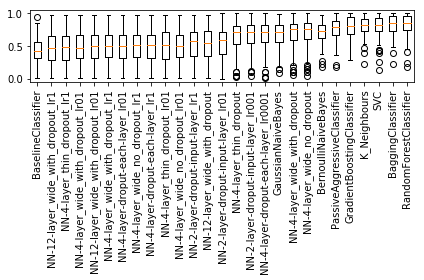

In [7]:
fig = analyze.plot_boxcharts(errors_per_estimator)

#### Average Rank

In [8]:
avg_rank = analyze.ranks(errors_per_estimator, ascending=False)
avg_rank.round(1)

,avg_rank
RandomForestClassifier,4.5
SVC,5.0
K_Neighbours,5.6
BaggingClassifier,5.7
GradientBoostingClassifier,7.6
PassiveAggressiveClassifier,8.5
NN-4-layer_wide_with_dropout,10.0
NN-4-layer_wide_no_dropout,10.4
BernoulliNaiveBayes,10.9
NN-4-layer-droput-each-layer_lr0001,11.0


In [9]:
ranks= avg_rank['avg_rank'].tolist()
names = avg_rank.index

In [10]:
ns = []
rs = []
first_nn_found = False

for r,n in zip(ranks,names):
    if n.startswith('NN') and first_nn_found == False:
        ns.append(n)
        rs.append(r)
        first_nn_found = True
    else:
        if not n.startswith('NN'):
            ns.append(n)
            rs.append(r)

In [11]:
cd = Orange.evaluation.compute_CD(rs,121)

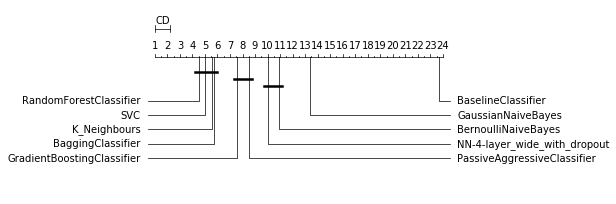

In [12]:
Orange.evaluation.graph_ranks(avranks=rs, names=ns, cd=cd)
plt.show()

#### Training time

In [13]:
avg_training_time, training_time_per_dataset = analyze.average_training_time(estimators)


In [14]:
avg_training_time

,avg training time (in sec)
RandomForestClassifier,1.334
NN-2-layer-droput-input-layer_lr001,6.415
NN-2-layer-droput-input-layer_lr01,6.428
NN-2-layer-droput-input-layer_lr1,6.459
SVC,501.947
BaggingClassifier,NaN
BaselineClassifier,NaN
BernoulliNaiveBayes,NaN
GaussianNaiveBayes,NaN
GradientBoostingClassifier,NaN


#### merge avg score, rank and training time

In [15]:
avg_metrics = pd.DataFrame.merge(avg_rank,avg_and_std_error, left_index=True, right_index=True)
avg_metrics = pd.DataFrame.merge(avg_metrics, avg_training_time,left_index=True, right_index=True)
avg_metrics
#change names of estimators
as_list = avg_metrics.index.tolist()
idx = as_list.index('NN-12-layer_wide_with_dropout')
as_list[idx] = 'NN-12-layer_wide_with_dropout_lr001'

idx = as_list.index('NN-4-layer_wide_with_dropout')
as_list[idx] = 'NN-4-layer_wide_with_dropout_lr001'

idx = as_list.index('NN-4-layer_wide_no_dropout')
as_list[idx] = 'NN-4-layer_wide_no_dropout_lr001'


idx = as_list.index('NN-4-layer_thin_dropout')
as_list[idx] = 'NN-4-layer_thin_dropout_lr001'

avg_metrics.index = as_list

avg_metrics

,avg_rank,avg_score,std_error,avg training time (in sec)
RandomForestClassifier,4.5,0.823,0.015,1.334
SVC,5.0,0.806,0.015,501.947
K_Neighbours,5.6,0.804,0.013,NaN
BaggingClassifier,5.7,0.818,0.014,NaN
GradientBoostingClassifier,7.6,0.788,0.016,NaN
PassiveAggressiveClassifier,8.5,0.757,0.016,NaN
NN-4-layer_wide_with_dropout_lr001,10.0,0.692,0.021,NaN
NN-4-layer_wide_no_dropout_lr001,10.4,0.694,0.021,NaN
BernoulliNaiveBayes,10.9,0.706,0.015,NaN
NN-4-layer-droput-each-layer_lr0001,11.0,0.665,0.022,NaN


#### Cohen's d

In [16]:
cohens_d = analyze.cohens_d(errors_per_estimator)
cohens_d.round(2)

estimator_2,BaselineClassifier,BernoulliNaiveBayes,GaussianNaiveBayes,GradientBoostingClassifier,K_Neighbours,NN-12-layer_wide_with_dropout,NN-12-layer_wide_with_dropout_lr01,NN-12-layer_wide_with_dropout_lr1,NN-2-layer-droput-input-layer_lr001,NN-2-layer-droput-input-layer_lr01,NN-2-layer-droput-input-layer_lr1,NN-4-layer-droput-each-layer_lr0001,NN-4-layer-droput-each-layer_lr01,NN-4-layer-droput-each-layer_lr1,NN-4-layer_thin_dropout,NN-4-layer_thin_dropout_lr01,NN-4-layer_thin_dropout_lr1,NN-4-layer_wide_no_dropout,NN-4-layer_wide_no_dropout_lr01,NN-4-layer_wide_no_dropout_lr1,NN-4-layer_wide_with_dropout,NN-4-layer_wide_with_dropout_lr01,NN-4-layer_wide_with_dropout_lr1,PassiveAggressiveClassifier,RandomForestClassifier,SVC
estimator_1,,,,,,,,,,,,,,,,,,,,,,,,,,
BaggingClassifier,-2.242,-0.729,-0.82,-0.188,-0.098,-1.421,-1.745,-1.818,-0.862,-1.361,-1.547,-0.79,-1.704,-1.689,-0.856,-1.618,-1.776,-0.663,-1.678,-1.686,-0.674,-1.76,-1.721,-0.384,0.034,-0.08
BaselineClassifier,,1.572,1.252,1.965,2.188,0.53,0.273,0.175,1.097,0.548,0.404,1.129,0.282,0.314,1.069,0.307,0.189,1.297,0.334,0.31,1.291,0.253,0.283,1.804,2.239,2.11
BernoulliNaiveBayes,,,-0.183,0.497,0.646,-0.838,-1.144,-1.227,-0.267,-0.792,-0.966,-0.208,-1.114,-1.093,-0.273,-1.047,-1.194,-0.064,-1.078,-1.092,-0.073,-1.161,-1.125,0.309,0.748,0.62
GaussianNaiveBayes,,,,0.616,0.748,-0.619,-0.894,-0.975,-0.088,-0.581,-0.738,-0.037,-0.87,-0.848,-0.097,-0.817,-0.949,0.099,-0.833,-0.849,0.091,-0.91,-0.878,0.451,0.837,0.73
GradientBoostingClassifier,,,,,0.1,-1.215,-1.52,-1.595,-0.672,-1.163,-1.337,-0.607,-1.485,-1.468,-0.67,-1.411,-1.559,-0.478,-1.455,-1.466,-0.489,-1.535,-1.499,-0.183,0.216,0.11
K_Neighbours,,,,,,-1.362,-1.688,-1.763,-0.795,-1.303,-1.489,-0.724,-1.648,-1.632,-0.79,-1.563,-1.721,-0.593,-1.62,-1.629,-0.604,-1.704,-1.664,-0.299,0.13,0.01
NN-12-layer_wide_with_dropout,,,,,,,-0.245,-0.33,0.508,0.025,-0.114,0.548,-0.232,-0.206,0.493,-0.197,-0.312,0.687,-0.189,-0.208,0.68,-0.263,-0.234,1.067,1.43,1.33
NN-12-layer_wide_with_dropout_lr01,,,,,,,,-0.089,0.768,0.268,0.128,0.805,0.011,0.039,0.749,0.041,-0.073,0.952,0.057,0.036,0.946,-0.018,0.011,1.37,1.75,1.64
NN-12-layer_wide_with_dropout_lr1,,,,,,,,,0.848,0.351,0.214,0.883,0.099,0.128,0.828,0.127,0.015,1.03,0.145,0.124,1.024,0.07,0.099,1.448,1.823,1.71


#### t-test

In [17]:
t_test, t_test_df = analyze.t_test(errors_per_estimator)
# t_test_df.round(3)
t_test

,estimator_1,estimator_2,p_val,t_stat
0,BaggingClassifier,BaggingClassifier,1.000,0.000
1,BaggingClassifier,BaselineClassifier,0.000,16.779
2,BaggingClassifier,BernoulliNaiveBayes,0.000,5.456
3,BaggingClassifier,GaussianNaiveBayes,0.000,6.137
4,BaggingClassifier,GradientBoostingClassifier,0.161,1.407
5,BaggingClassifier,K_Neighbours,0.463,0.734
6,BaggingClassifier,NN-12-layer_wide_with_dropout,0.000,10.631
7,BaggingClassifier,NN-12-layer_wide_with_dropout_lr01,0.000,13.058
8,BaggingClassifier,NN-12-layer_wide_with_dropout_lr1,0.000,13.606
9,BaggingClassifier,NN-2-layer-droput-input-layer_lr001,0.000,6.453


#### sign test

In [19]:
sign_test_df, sign_test_pivot = analyze.sign_test(errors_per_estimator)
sign_test_pivot

estimator_2,BaggingClassifier,BaselineClassifier,BernoulliNaiveBayes,GaussianNaiveBayes,GradientBoostingClassifier,K_Neighbours,NN-12-layer_wide_with_dropout,NN-12-layer_wide_with_dropout_lr01,NN-12-layer_wide_with_dropout_lr1,NN-2-layer-droput-input-layer_lr001,NN-2-layer-droput-input-layer_lr01,NN-2-layer-droput-input-layer_lr1,NN-4-layer-droput-each-layer_lr0001,NN-4-layer-droput-each-layer_lr01,NN-4-layer-droput-each-layer_lr1,NN-4-layer_thin_dropout,NN-4-layer_thin_dropout_lr01,NN-4-layer_thin_dropout_lr1,NN-4-layer_wide_no_dropout,NN-4-layer_wide_no_dropout_lr01,NN-4-layer_wide_no_dropout_lr1,NN-4-layer_wide_with_dropout,NN-4-layer_wide_with_dropout_lr01,NN-4-layer_wide_with_dropout_lr1,PassiveAggressiveClassifier,RandomForestClassifier,SVC
estimator_1,,,,,,,,,,,,,,,,,,,,,,,,,,,
BaggingClassifier,0.000,0.0,0.000,0.000,0.008,0.452,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.851
BaselineClassifier,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
BernoulliNaiveBayes,0.000,0.0,0.000,0.573,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.452,0.000,0.000,0.851,0.000,0.000,0.024,0.000,0.000,0.132,0.000,0.000,0.000,0.000,0.000
GaussianNaiveBayes,0.000,0.0,0.059,0.000,0.000,0.000,0.024,0.000,0.000,0.059,0.000,0.000,0.002,0.000,0.000,0.038,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
GradientBoostingClassifier,0.000,0.0,0.000,0.000,0.000,0.038,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.707,0.000,0.000
K_Neighbours,0.005,0.0,0.000,0.000,0.851,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
NN-12-layer_wide_with_dropout,0.000,0.0,0.000,0.001,0.000,0.000,0.000,0.008,0.038,0.000,0.024,0.024,0.000,0.024,0.001,0.000,0.002,0.132,0.000,0.005,0.014,0.000,0.038,0.002,0.000,0.000,0.000
NN-12-layer_wide_with_dropout_lr01,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
NN-12-layer_wide_with_dropout_lr1,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


#### t-test with Bonferroni correction

In [20]:
t_test_bonferroni_df = analyze.t_test_with_bonferroni_correction(errors_per_estimator)
t_test_bonferroni_df

,BaggingClassifier,BaselineClassifier,BernoulliNaiveBayes,GaussianNaiveBayes,GradientBoostingClassifier,K_Neighbours,NN-12-layer_wide_with_dropout,NN-12-layer_wide_with_dropout_lr01,NN-12-layer_wide_with_dropout_lr1,NN-2-layer-droput-input-layer_lr001,NN-2-layer-droput-input-layer_lr01,NN-2-layer-droput-input-layer_lr1,NN-4-layer-droput-each-layer_lr0001,NN-4-layer-droput-each-layer_lr01,NN-4-layer-droput-each-layer_lr1,NN-4-layer_thin_dropout,NN-4-layer_thin_dropout_lr01,NN-4-layer_thin_dropout_lr1,NN-4-layer_wide_no_dropout,NN-4-layer_wide_no_dropout_lr01,NN-4-layer_wide_no_dropout_lr1,NN-4-layer_wide_with_dropout,NN-4-layer_wide_with_dropout_lr01,NN-4-layer_wide_with_dropout_lr1,PassiveAggressiveClassifier,RandomForestClassifier,SVC
BaggingClassifier,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False
BaselineClassifier,True,False,True,True,True,True,True,False,False,True,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,True,True
BernoulliNaiveBayes,True,True,False,False,True,True,True,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True
GaussianNaiveBayes,True,True,False,False,True,True,True,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True
GradientBoostingClassifier,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False
K_Neighbours,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False
NN-12-layer_wide_with_dropout,True,True,True,True,True,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,True,True
NN-12-layer_wide_with_dropout_lr01,True,False,True,True,True,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,True,True
NN-12-layer_wide_with_dropout_lr1,True,False,True,True,True,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,True,True
NN-2-layer-droput-input-layer_lr001,True,True,False,False,True,True,True,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,True,True,True


In [21]:
for e in estim:
    print(e.properties['name'])

RandomForestClassifier
BaggingClassifier
GradientBoostingClassifier
SVC
GaussianNaiveBayes
BernoulliNaiveBayes
NeuralNetworkDeepClassifier
PassiveAggressiveClassifier
BaselineClassifier
K_Neighbours


#### Wilcoxon test

In [22]:
a, wilcoxon_df_multiindex = analyze.wilcoxon_test(errors_per_estimator)
wilcoxon_df_multiindex

/media/viktor/Data/PhD/mlaut/py36/lib/python3.6/site-packages/scipy/stats/morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/media/viktor/Data/PhD/mlaut/py36/lib/python3.6/site-packages/scipy/stats/morestats.py:2410: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se


BaggingClassifier         \
                                            statistic  p_val   
BaggingClassifier                                 0.0    NaN   
BaselineClassifier                                6.0  0.000   
BernoulliNaiveBayes                             443.5  0.000   
GaussianNaiveBayes                              411.5  0.000   
GradientBoostingClassifier                      984.0  0.000   
K_Neighbours                                   1929.0  0.020   
NN-12-layer_wide_with_dropout                   218.0  0.000   
NN-12-layer_wide_with_dropout_lr01              148.0  0.000   
NN-12-layer_wide_with_dropout_lr1               119.0  0.000   
NN-2-layer-droput-input-layer_lr001             475.0  0.000   
NN-2-layer-droput-input-layer_lr01              142.0  0.000   
NN-2-layer-droput-input-layer_lr1               174.0  0.000   
NN-4-layer-droput-each-layer_lr0001             633.0  0.000   
NN-4-layer-droput-each-layer_lr01               122.0  0.000   
NN-4-layer-droput-each-layer_lr1                139.0  0.000   
NN-4-layer_thin_dropout                         507.0  0.000   
NN-4-layer_thin_dropout_lr01                    118.0  0.000   
NN-4-layer_thin_dropout_lr1                     103.0  0.000   
NN-4-layer_wide_no_dropout                      702.5  0.000   
NN-4-layer_wide_no_dropout_lr01                 106.0  0.000   
NN-4-layer_wide_no_dropout_lr1                  112.0  0.000   
NN-4-layer_wide_with_dropout                    698.5  0.000   
NN-4-layer_wide_with_dropout_lr01               123.0  0.000   
NN-4-layer_wide_with_dropout_lr1                114.0  0.000   
PassiveAggressiveClassifier                     980.0  0.000   
RandomForestClassifier                         1459.0  0.005   
SVC                                            2571.0  0.606   

                                    BaselineClassifier        \
                                             statistic p_val   
BaggingClassifier                                  6.0   0.0   
BaselineClassifier                                 0.0   NaN   
BernoulliNaiveBayes                               49.0   0.0   
GaussianNaiveBayes                               400.0   0.0   
GradientBoostingClassifier                        23.5   0.0   
K_Neighbours                                       1.0   0.0   
NN-12-layer_wide_with_dropout                    574.0   0.0   
NN-12-layer_wide_with_dropout_lr01              1061.0   0.0   
NN-12-layer_wide_with_dropout_lr1               1393.0   0.0   
NN-2-layer-droput-input-layer_lr001               52.0   0.0   
NN-2-layer-droput-input-layer_lr01               239.0   0.0   
NN-2-layer-droput-input-layer_lr1                649.0   0.0   
NN-4-layer-droput-each-layer_lr0001               53.0   0.0   
NN-4-layer-droput-each-layer_lr01               1023.0   0.0   
NN-4-layer-droput-each-layer_lr1                 732.0   0.0   
NN-4-layer_thin_dropout                           60.0   0.0   
NN-4-layer_thin_dropout_lr01                    1118.0   0.0   
NN-4-layer_thin_dropout_lr1                     1555.0   0.0   
NN-4-layer_wide_no_dropout                        27.0   0.0   
NN-4-layer_wide_no_dropout_lr01                  816.0   0.0   
NN-4-layer_wide_no_dropout_lr1                   899.0   0.0   
NN-4-layer_wide_with_dropout                      40.0   0.0   
NN-4-layer_wide_with_dropout_lr01               1212.5   0.0   
NN-4-layer_wide_with_dropout_lr1                 999.5   0.0   
PassiveAggressiveClassifier                       11.5   0.0   
RandomForestClassifier                             0.0   0.0   
SVC                                                0.0   0.0   

                                    BernoulliNaiveBayes         \
                                              statistic  p_val   
BaggingClassifier                                 443.5  0.000   
BaselineClassifier                                 49.0  0.000   
BernoulliNaiveBayes                                 0.0   

#### Ranksum test

In [23]:
_, ranksum_pivot = analyze.ranksum_test(errors_per_estimator)
ranksum_pivot

BaggingClassifier         \
                                               t_stat  p_val   
BaggingClassifier                               0.000  1.000   
BaselineClassifier                            -11.512  0.000   
BernoulliNaiveBayes                            -5.411  0.000   
GaussianNaiveBayes                             -5.837  0.000   
GradientBoostingClassifier                     -1.225  0.221   
K_Neighbours                                   -0.899  0.368   
NN-12-layer_wide_with_dropout                  -8.919  0.000   
NN-12-layer_wide_with_dropout_lr01            -10.169  0.000   
NN-12-layer_wide_with_dropout_lr1             -10.416  0.000   
NN-2-layer-droput-input-layer_lr001            -5.905  0.000   
NN-2-layer-droput-input-layer_lr01             -8.770  0.000   
NN-2-layer-droput-input-layer_lr1              -9.558  0.000   
NN-4-layer-droput-each-layer_lr0001            -5.420  0.000   
NN-4-layer-droput-each-layer_lr01             -10.102  0.000   
NN-4-layer-droput-each-layer_lr1              -10.048  0.000   
NN-4-layer_thin_dropout                        -6.019  0.000   
NN-4-layer_thin_dropout_lr01                   -9.773  0.000   
NN-4-layer_thin_dropout_lr1                   -10.269  0.000   
NN-4-layer_wide_no_dropout                     -4.518  0.000   
NN-4-layer_wide_no_dropout_lr01               -10.011  0.000   
NN-4-layer_wide_no_dropout_lr1                -10.074  0.000   
NN-4-layer_wide_with_dropout                   -4.632  0.000   
NN-4-layer_wide_with_dropout_lr01             -10.189  0.000   
NN-4-layer_wide_with_dropout_lr1              -10.127  0.000   
PassiveAggressiveClassifier                    -2.776  0.005   
RandomForestClassifier                          0.500  0.617   
SVC                                            -0.443  0.658   

                                    BaselineClassifier         \
                                                t_stat  p_val   
BaggingClassifier                               11.512  0.000   
BaselineClassifier                               0.000  1.000   
BernoulliNaiveBayes                              9.649  0.000   
GaussianNaiveBayes                               8.274  0.000   
GradientBoostingClassifier                      10.756  0.000   
K_Neighbours                                    11.425  0.000   
NN-12-layer_wide_with_dropout                    3.832  0.000   
NN-12-layer_wide_with_dropout_lr01               1.902  0.057   
NN-12-layer_wide_with_dropout_lr1                1.277  0.202   
NN-2-layer-droput-input-layer_lr001              7.532  0.000   
NN-2-layer-droput-input-layer_lr01               4.271  0.000   
NN-2-layer-droput-input-layer_lr1                3.246  0.001   
NN-4-layer-droput-each-layer_lr0001              7.881  0.000   
NN-4-layer-droput-each-layer_lr01                2.181  0.029   
NN-4-layer-droput-each-layer_lr1                 2.406  0.016   
NN-4-layer_thin_dropout                          7.504  0.000   
NN-4-layer_thin_dropout_lr01                     2.387  0.017   
NN-4-layer_thin_dropout_lr1                      1.414  0.157   
NN-4-layer_wide_no_dropout                       8.587  0.000   
NN-4-layer_wide_no_dropout_lr01                  2.473  0.013   
NN-4-layer_wide_no_dropout_lr1                   2.370  0.018   
NN-4-layer_wide_with_dropout                     8.526  0.000   
NN-4-layer_wide_with_dropout_lr01                1.745  0.081   
NN-4-layer_wide_with_dropout_lr1                 2.121  0.034   
PassiveAggressiveClassifier                     10.408  0.000   
RandomForestClassifier                          11.543  0.000   
SVC                                             11.236  0.000   

                                    BernoulliNaiveBayes         \
                                                 t_stat  p_val   
BaggingClassifier                                 5.411  0.000   
BaselineClassifier                               -9.649  0.000   
BernoulliNaiveBayes          

#### Friedman test

In [27]:
_, friedman_test_df = analyze.friedman_test(errors_per_estimator)
friedman_test_df

,statistic,p_value
0,1561.736,0.0


In [28]:
nemeniy_test = analyze.nemenyi(errors_per_estimator)
nemeniy_test_df = pd.DataFrame(nemeniy_test)
nemeniy_test_df

,BaggingClassifier,BaselineClassifier,BernoulliNaiveBayes,GaussianNaiveBayes,GradientBoostingClassifier,K_Neighbours,NN-12-layer_wide_with_dropout,NN-12-layer_wide_with_dropout_lr01,NN-12-layer_wide_with_dropout_lr1,NN-2-layer-droput-input-layer_lr001,NN-2-layer-droput-input-layer_lr01,NN-2-layer-droput-input-layer_lr1,NN-4-layer-droput-each-layer_lr0001,NN-4-layer-droput-each-layer_lr01,NN-4-layer-droput-each-layer_lr1,NN-4-layer_thin_dropout,NN-4-layer_thin_dropout_lr01,NN-4-layer_thin_dropout_lr1,NN-4-layer_wide_no_dropout,NN-4-layer_wide_no_dropout_lr01,NN-4-layer_wide_no_dropout_lr1,NN-4-layer_wide_with_dropout,NN-4-layer_wide_with_dropout_lr01,NN-4-layer_wide_with_dropout_lr1,PassiveAggressiveClassifier,RandomForestClassifier,SVC
BaggingClassifier,-1.000,0.000,0.938,0.597,1.000,1.000,0.000,0.000,0.000,0.338,0.000,0.000,0.574,0.000,0.000,0.308,0.000,0.000,0.946,0.000,0.000,0.942,0.000,0.000,1.000,1.000,1.000
BaselineClassifier,0.000,-1.000,0.000,0.000,0.000,0.000,0.986,1.000,1.000,0.002,0.969,1.000,0.000,1.000,1.000,0.002,1.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000
BernoulliNaiveBayes,0.938,0.000,-1.000,1.000,1.000,0.988,0.509,0.010,0.002,1.000,0.624,0.149,1.000,0.016,0.025,1.000,0.048,0.003,1.000,0.032,0.024,1.000,0.008,0.015,1.000,0.871,0.977
GaussianNaiveBayes,0.597,0.000,1.000,-1.000,0.973,0.822,0.903,0.121,0.036,1.000,0.947,0.567,1.000,0.163,0.212,1.000,0.314,0.054,1.000,0.245,0.209,1.000,0.100,0.158,1.000,0.447,0.749
GradientBoostingClassifier,1.000,0.000,1.000,0.973,-1.000,1.000,0.000,0.000,0.000,0.885,0.000,0.000,0.969,0.000,0.000,0.867,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000
K_Neighbours,1.000,0.000,0.988,0.822,1.000,-1.000,0.000,0.000,0.000,0.594,0.000,0.000,0.806,0.000,0.000,0.561,0.000,0.000,0.990,0.000,0.000,0.990,0.000,0.000,1.000,1.000,1.000
NN-12-layer_wide_with_dropout,0.000,0.986,0.509,0.903,0.000,0.000,-1.000,1.000,1.000,0.979,1.000,1.000,0.914,1.000,1.000,0.983,1.000,1.000,0.486,1.000,1.000,0.496,1.000,1.000,0.006,0.000,0.000
NN-12-layer_wide_with_dropout_lr01,0.000,1.000,0.010,0.121,0.000,0.000,1.000,-1.000,1.000,0.299,1.000,1.000,0.133,1.000,1.000,0.329,1.000,1.000,0.009,1.000,1.000,0.009,1.000,1.000,0.000,0.000,0.000
NN-12-layer_wide_with_dropout_lr1,0.000,1.000,0.002,0.036,0.000,0.000,1.000,1.000,-1.000,0.122,1.000,1.000,0.041,1.000,1.000,0.139,1.000,1.000,0.001,1.000,1.000,0.002,1.000,1.000,0.000,0.000,0.000
NN-2-layer-droput-input-layer_lr001,0.338,0.002,1.000,1.000,0.885,0.594,0.979,0.299,0.122,-1.000,0.991,0.803,1.000,0.369,0.441,1.000,0.570,0.164,1.000,0.487,0.437,1.000,0.260,0.361,0.997,0.216,0.498


### Per dataset

In [29]:
errors_per_dataset_per_estimator_df

loss  \
abalone                   BaggingClassifier                    0.37708   
                          BaselineClassifier                   0.66715   
                          BernoulliNaiveBayes                  0.44888   
                          GaussianNaiveBayes                   0.44017   
                          GradientBoostingClassifier           0.38869   
                          K_Neighbours                         0.36476   
                          NN-12-layer_wide_with_dropout        0.36766   
                          NN-12-layer_wide_with_dropout_lr01   0.65627   
                          NN-12-layer_wide_with_dropout_lr1    0.65627   
                          NN-2-layer-droput-input-layer_lr001  0.62872   
                          NN-2-layer-droput-input-layer_lr01   0.47208   
                          NN-2-layer-droput-input-layer_lr1    0.58231   
                          NN-4-layer-droput-each-layer_lr0001  0.35025   
                          NN-4-layer-droput-each-layer_lr01    0.67368   
                          NN-4-layer-droput-each-layer_lr1     0.67368   
                          NN-4-layer_thin_dropout              0.38724   
                          NN-4-layer_thin_dropout_lr01         0.65627   
                          NN-4-layer_thin_dropout_lr1          0.65627   
                          NN-4-layer_wide_no_dropout           0.36186   
                          NN-4-layer_wide_no_dropout_lr01      0.57360   
                          NN-4-layer_wide_no_dropout_lr1       0.67005   
                          NN-4-layer_wide_with_dropout         0.37563   
                          NN-4-layer_wide_with_dropout_lr01    0.67368   
                          NN-4-layer_wide_with_dropout_lr1     0.67368   
                          PassiveAggressiveClassifier          0.37346   
                          RandomForestClassifier               0.36331   
                          SVC                                  0.35460   
acute_inflammation        BaggingClassifier                    0.00000   
                          BaselineClassifier                   0.32500   
                          BernoulliNaiveBayes                  0.12500   
                          GaussianNaiveBayes                   0.17500   
                          GradientBoostingClassifier           0.00000   
                          K_Neighbours                         0.00000   
                          NN-12-layer_wide_with_dropout        0.47500   
                          NN-12-layer_wide_with_dropout_lr01   0.52500   
                          NN-12-layer_wide_with_dropout_lr1    0.52500   
                          NN-2-layer-droput-input-layer_lr001  0.00000   
                          NN-2-layer-droput-input-layer_lr01   0.15000   
                          NN-2-layer-droput-input-layer_lr1    0.35000   
                          NN-4-layer-droput-each-layer_lr0001  0.00000   
                          NN-4-layer-droput-each-layer_lr01    0.52500   
                          NN-4-layer-droput-each-layer_lr1     0.47500   
                          NN-4-layer_thin_dropout              0.05000   
                          NN-4-layer_thin_dropout_lr01         0.45000   
                          NN-4-layer_thin_dropout_lr1          0.52500   
                          NN-4-layer_wide_no_dropout           0.00000   
                          NN-4-layer_wide_no_dropout_lr01      0.52500   
                          NN-4-layer_wide_no_dropout_lr1       0.52500   
                          NN-4-layer_wide_with_dropout         0.00000   
                          NN-4-layer_wide_with_dropout_lr01    0.52500   
                          NN-4-layer_wide_with_dropout_lr1     0.47500   
                          PassiveAggressiveClassifier          0.00000   
                          RandomForestClassifier               0.00000   
                          SVC                                  0.20000

## Save tables to $\LaTeX$

In [25]:
#t-test
with open('../mlaut-paper/mlaut/tables/t_test.tex', 'w') as tf:
    tf.write(t_test_df.to_latex())
    
t_test1 = t_test_df.iloc[:,0:8]
t_test2 = t_test_df.iloc[:,8:16]
t_test3 = t_test_df.iloc[:,16:24]
t_test4 = t_test_df.iloc[:,24:32]
t_test5 = t_test_df.iloc[:,32:40]
t_test6 = t_test_df.iloc[:,40:48]
t_test7 = t_test_df.iloc[:,48:54]

with open('../mlaut-paper/mlaut/tables/t_test1.tex', 'w') as tf:
    tf.write(t_test1.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test2.tex', 'w') as tf:
    tf.write(t_test2.to_latex()) 
with open('../mlaut-paper/mlaut/tables/t_test3.tex', 'w') as tf:
    tf.write(t_test3.to_latex()) 
with open('../mlaut-paper/mlaut/tables/t_test4.tex', 'w') as tf:
    tf.write(t_test4.to_latex()) 
with open('../mlaut-paper/mlaut/tables/t_test5.tex', 'w') as tf:
    tf.write(t_test5.to_latex()) 
with open('../mlaut-paper/mlaut/tables/t_test6.tex', 'w') as tf:
    tf.write(t_test6.to_latex()) 
with open('../mlaut-paper/mlaut/tables/t_test7.tex', 'w') as tf:
    tf.write(t_test7.to_latex()) 

In [26]:
#t-test with Bonferroni
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni.tex', 'w') as tf:
    tf.write(t_test_bonferroni_df.to_latex())
    
t_test_bonferroni1 = t_test_bonferroni_df.iloc[:,0:4]
t_test_bonferroni2 = t_test_bonferroni_df.iloc[:,4:8]
t_test_bonferroni3 = t_test_bonferroni_df.iloc[:,8:12]
t_test_bonferroni4 = t_test_bonferroni_df.iloc[:,12:16]
t_test_bonferroni5 = t_test_bonferroni_df.iloc[:,16:20]
t_test_bonferroni6 = t_test_bonferroni_df.iloc[:,20:24]
t_test_bonferroni7 = t_test_bonferroni_df.iloc[:,24:27]

with open('../mlaut-paper/mlaut/tables/t_test_bonferroni1.tex', 'w') as tf:
    tf.write(t_test_bonferroni1.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni2.tex', 'w') as tf:
    tf.write(t_test_bonferroni2.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni3.tex', 'w') as tf:
    tf.write(t_test_bonferroni3.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni4.tex', 'w') as tf:
    tf.write(t_test_bonferroni4.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni5.tex', 'w') as tf:
    tf.write(t_test_bonferroni5.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni6.tex', 'w') as tf:
    tf.write(t_test_bonferroni6.to_latex())
with open('../mlaut-paper/mlaut/tables/t_test_bonferroni7.tex', 'w') as tf:
    tf.write(t_test_bonferroni7.to_latex())

In [24]:
#ranksum test
with open('../mlaut-paper/mlaut/tables/ranksum_test.tex', 'w') as tf:
    tf.write(ranksum_pivot.to_latex())
ranksum_test1 = ranksum_pivot.iloc[:,0:8]
ranksum_test2 = ranksum_pivot.iloc[:,8:16]
ranksum_test3 = ranksum_pivot.iloc[:,16:24]
ranksum_test4 = ranksum_pivot.iloc[:,24:32]
ranksum_test5 = ranksum_pivot.iloc[:,32:40]
ranksum_test6 = ranksum_pivot.iloc[:,40:48]
ranksum_test7 = ranksum_pivot.iloc[:,48:54]
with open('../mlaut-paper/mlaut/tables/ranksum_test1.tex', 'w') as tf:
    tf.write(ranksum_test1.to_latex())
with open('../mlaut-paper/mlaut/tables/ranksum_test2.tex', 'w') as tf:
    tf.write(ranksum_test2.to_latex())
with open('../mlaut-paper/mlaut/tables/ranksum_test3.tex', 'w') as tf:
    tf.write(ranksum_test3.to_latex())
with open('../mlaut-paper/mlaut/tables/ranksum_test4.tex', 'w') as tf:
    tf.write(ranksum_test4.to_latex())
with open('../mlaut-paper/mlaut/tables/ranksum_test5.tex', 'w') as tf:
    tf.write(ranksum_test5.to_latex())
with open('../mlaut-paper/mlaut/tables/ranksum_test6.tex', 'w') as tf:
    tf.write(ranksum_test6.to_latex())
with open('../mlaut-paper/mlaut/tables/ranksum_test7.tex', 'w') as tf:
    tf.write(ranksum_test7.to_latex())

In [56]:
#sign test
with open('../mlaut-paper/mlaut/tables/sign_test.tex', 'w') as tf:
    tf.write(sign_df_pivot.to_latex())
    
sign_test1 = sign_df_pivot.iloc[:,0:5]
sign_test2 = sign_df_pivot.iloc[:,5:10]
sign_test3 = sign_df_pivot.iloc[:,10:16]
sign_test4 = sign_df_pivot.iloc[:,16:22]
sign_test5 = sign_df_pivot.iloc[:,22:27]
with open('../mlaut-paper/mlaut/tables/sign_test1.tex', 'w') as tf:
    tf.write(sign_test1.to_latex())
with open('../mlaut-paper/mlaut/tables/sign_test2.tex', 'w') as tf:
    tf.write(sign_test2.to_latex())
with open('../mlaut-paper/mlaut/tables/sign_test3.tex', 'w') as tf:
    tf.write(sign_test3.to_latex())
with open('../mlaut-paper/mlaut/tables/sign_test4.tex', 'w') as tf:
    tf.write(sign_test4.to_latex())
with open('../mlaut-paper/mlaut/tables/sign_test5.tex', 'w') as tf:
    tf.write(sign_test5.to_latex())

In [57]:
#Wilcoxon
with open('../mlaut-paper/mlaut/tables/wilxocon_test.tex', 'w') as tf:
    tf.write(wilcoxon_df_multiindex.to_latex())
    
wilcoxon1 = wilcoxon_df_multiindex.iloc[:,0:8]
wilcoxon2 = wilcoxon_df_multiindex.iloc[:,8:16]
wilcoxon3 = wilcoxon_df_multiindex.iloc[:,16:24]
wilcoxon4 = wilcoxon_df_multiindex.iloc[:,24:32]
wilcoxon5 = wilcoxon_df_multiindex.iloc[:,32:40]
wilcoxon6 = wilcoxon_df_multiindex.iloc[:,40:48]
wilcoxon7 = wilcoxon_df_multiindex.iloc[:,48:54]

with open('../mlaut-paper/mlaut/tables/wilcoxon_test1.tex', 'w') as tf:
    tf.write(wilcoxon1.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test2.tex', 'w') as tf:
    tf.write(wilcoxon2.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test3.tex', 'w') as tf:
    tf.write(wilcoxon3.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test4.tex', 'w') as tf:
    tf.write(wilcoxon4.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test5.tex', 'w') as tf:
    tf.write(wilcoxon5.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test6.tex', 'w') as tf:
    tf.write(wilcoxon6.to_latex())
with open('../mlaut-paper/mlaut/tables/wilcoxon_test7.tex', 'w') as tf:
    tf.write(wilcoxon7.to_latex())

In [31]:
#Nemeniy test
with open('../mlaut-paper/mlaut/tables/nemeniy_test.tex', 'w') as tf:
    tf.write(nemeniy_test_df.to_latex())
    
nemeniy_test1 = nemeniy_test_df.iloc[:,0:4]
nemeniy_test2 = nemeniy_test_df.iloc[:,4:8]
nemeniy_test3 = nemeniy_test_df.iloc[:,8:12]
nemeniy_test4 = nemeniy_test_df.iloc[:,12:16]
nemeniy_test5 = nemeniy_test_df.iloc[:,16:20]
nemeniy_test6 = nemeniy_test_df.iloc[:,20:24]
nemeniy_test7 = nemeniy_test_df.iloc[:,24:27]

with open('../mlaut-paper/mlaut/tables/nemeniy_test1.tex', 'w') as tf:
    tf.write(nemeniy_test1.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test2.tex', 'w') as tf:
    tf.write(nemeniy_test2.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test3.tex', 'w') as tf:
    tf.write(nemeniy_test3.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test4.tex', 'w') as tf:
    tf.write(nemeniy_test4.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test5.tex', 'w') as tf:
    tf.write(nemeniy_test5.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test6.tex', 'w') as tf:
    tf.write(nemeniy_test6.to_latex())
with open('../mlaut-paper/mlaut/tables/nemeniy_test7.tex', 'w') as tf:
    tf.write(nemeniy_test7.to_latex())

In [32]:
#average and standard error
with open('../mlaut-paper/mlaut/tables/avg_and_st_error.tex', 'w') as tf:
    tf.write(avg_and_std_error.to_latex())
#average trining time
with open('../mlaut-paper/mlaut/tables/avg_training_time.tex', 'w') as tf:
    tf.write(avg_training_time.to_latex())
#average rank
with open('../mlaut-paper/mlaut/tables/avg_rank.tex', 'w') as tf:
    tf.write(avg_rank.to_latex())

#average metrics
with open('../mlaut-paper/mlaut/tables/avg_metrics.tex', 'w') as tf:
    tf.write(avg_metrics.to_latex())
#Cohen's D
with open('../mlaut-paper/mlaut/tables/cohens_d.tex', 'w') as tf:
    tf.write(cohens_d.to_latex())



#Errors per dataset per estimator
with open('../mlaut-paper/mlaut/tables/errors_per_dataset_per_estimator.tex', 'w') as tf:
    tf.write(errors_per_dataset_per_estimator_df.to_latex(longtable=True))
#              replace('\n', '\n\\caption{Errors per dataset and estimator}\\\\\n', 1))

In [33]:
with open('../mlaut-paper/mlaut/tables/friedman_test.tex', 'w') as tf:
    tf.write(friedman_test_df.to_latex(index=False))

In [34]:
#save bax chart with results
fig.savefig('../mlaut-paper/mlaut/images/boxchart_results.png', dpi=200)